In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from docx import Document

from matplotlib.pyplot import figure

input_file1 = 'banks_total 1v.csv'
df1 = pd.read_csv('C:/Users/user/PycharmProjects/Monitoring/Monitoring/{}'.format(input_file1))
banks_number1 = df1.shape[0] 
df1 = df1.rename(index=str, columns={"AttachmentRef без id": "Не указан id для вложения в пакете СМЭВ", "Не указан RegistrarMnemonic": "При регистрации не указана  мнемоника ИС банка", "Не удалось извлечь биометрический шаблон. Модальность: 'sound'": "Два голоса на записи", "Не удалось извлечь биометрический шаблон. Модальность: 'photo'": "Присутствие второго лица на фото"})
df1 = df1.drop(columns=['Неудовлетворительное качество БО', 'Проблемы взаимодействия со СМЭВ (агрегированная ошибка)'])
input_file1 = '22.07-26.07'
per1 = 'Период ' + input_file1 #Убери лишнее

input_file2 = 'banks_total 2v.csv'
df2 = pd.read_csv('C:/Users/user/PycharmProjects/Monitoring/Monitoring/{}'.format(input_file2))
banks_number2 = df2.shape[0] # Подсчет числа банков
df2 = df2.rename(index=str, columns={"AttachmentRef без id": "Не указан id для вложения в пакете СМЭВ", "Не указан RegistrarMnemonic": "При регистрации не указана  мнемоника ИС банка", "Не удалось извлечь биометрический шаблон. Модальность: 'sound'": "Два голоса на записи", "Не удалось извлечь биометрический шаблон. Модальность: 'photo'": "Присутствие второго лица на фото"})
df2 = df2.drop(columns=['Неудовлетворительное качество БО', 'Проблемы взаимодействия со СМЭВ (агрегированная ошибка)'])
input_file2 = '29.07-02.08'
per2 = 'Период ' + input_file2 #Убери лишнее

per_sum = 'Период ' + input_file1 + ' - ' + input_file2 #Убери лишнее

In [168]:
sum1 = df1.sum(axis=0)
sum2 = df2.sum(axis=0)

sum1['Банк'] = banks_number1
sum2['Банк'] = banks_number2

proc_success1 = sum1['Успешные регистрации'] / sum1['Всего попыток регистрации']
proc_unsuccess1 = sum1['Всего неуспешных'] / sum1['Всего попыток регистрации']

sum1['% успешных'] = proc_success1
sum1['% неуспешных'] = proc_unsuccess1 

proc_success2 = sum2['Успешные регистрации'] / sum2['Всего попыток регистрации']
proc_unsuccess2 = sum2['Всего неуспешных'] / sum2['Всего попыток регистрации']

sum2['% успешных'] = proc_success2
sum2['% неуспешных'] = proc_unsuccess2 

sum_result = pd.concat([sum1, sum2], axis=1, sort=False).fillna(0)

# Обязательно копируем датафрей sum_result
dynamics = pd.DataFrame(sum_result)
# Дропаем одну колонку
dynamics = dynamics.drop(columns=[1])
# Чистим колонку
dynamics = dynamics[0:].isnull()
# Переназываем колонку
dynamics = dynamics.rename(index=str, columns={0: 2})

# Объединяем 
sum_result = pd.concat([sum_result, dynamics], axis=1, sort=False).fillna(0)

# Заполняем столбец Динамики
sum_result[2]=sum_result[1]-sum_result[0]

# Переименовываем в нормальный вид
sum_result = sum_result.rename(index=str, columns={0: per1, 1: per2, 2: 'Динамика'})

In [170]:
# Убиваем лишние 0 после запятой 
for i in range(sum_result.shape[0]):
    if type(sum_result.index.values[i]) == str:
        pass
    elif type(sum_result.index.values[i]) == numpy.float64:
        sum_result.index.values[i] = "%.3f" % sum_result.index.values[i]
    for j in range(sum_result.shape[-1]):
        if type(sum_result.values[i,j]) == str:
            pass
        elif type(sum_result.values[i,j]) == numpy.float64:
            sum_result.values[i,j] = "%.3f" % sum_result.values[i,j] 

sum_result

,Период 22.07-26.07,Период 29.07-02.08,Динамика
Банк,75.000,70.000,-5.000
Всего попыток регистрации,1242.000,1331.000,89.000
Успешные регистрации,1117.000,1214.000,97.000
% успешных,0.899,0.912,0.013
Всего неуспешных,125.000,117.000,-8.000
% неуспешных,0.101,0.088,-0.013
не пройдена проверка на расстояние между центрами глаз,2.000,0.000,-2.000
Передан не правильный формат данных (запрос с неправильными параметрами),1.000,0.000,-1.000
Не удалось выделить лицо на изображении (108),1.000,0.000,-1.000
Не правильный формат звуковых данных,1.000,1.000,0.000


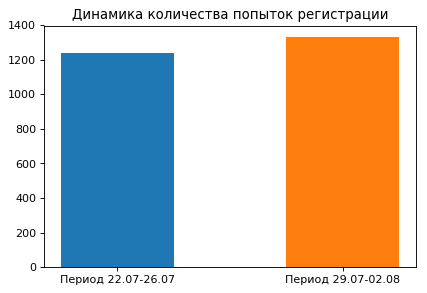

In [135]:
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

width = 0.5
plt.bar(per1, sum1.loc['Всего попыток регистрации'], align='center', width=width)
plt.bar(per2, sum2.loc['Всего попыток регистрации'], align='center', width=width)

plt.title('Динамика количества попыток регистрации')

plt.savefig('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/all_reg_tries.png')
plt.show()

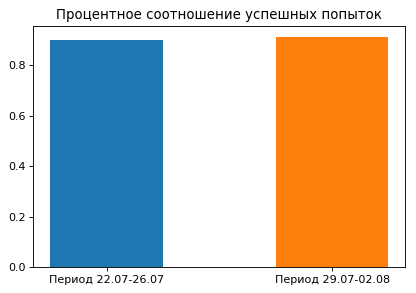

In [136]:
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

width = 0.5
plt.bar(per1, sum1.loc['% успешных'], align='center', width=width)
plt.bar(per2, sum2.loc['% успешных'], align='center', width=width)

plt.title('Процентное соотношение успешных попыток')

plt.savefig('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/percent_success.png')
plt.show()

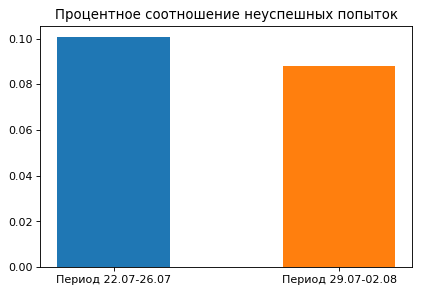

In [137]:
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

width = 0.5
plt.bar(per1, sum1.loc['% неуспешных'], align='center', width=width)
plt.bar(per2, sum2.loc['% неуспешных'], align='center', width=width)

plt.title('Процентное соотношение неуспешных попыток')

plt.savefig('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/percent_unsuccess.png')
plt.show()

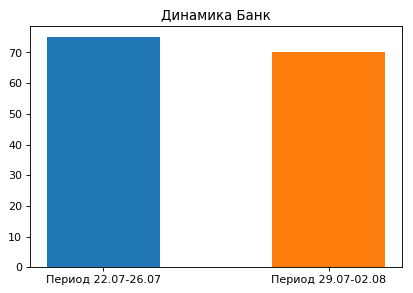

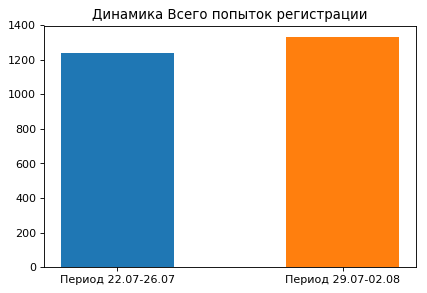

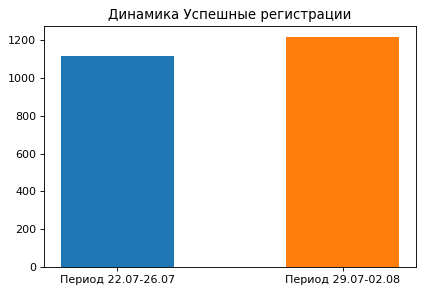

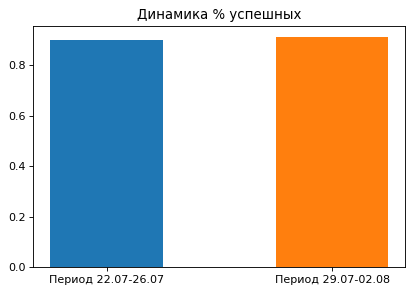

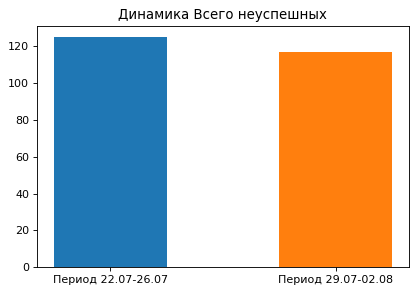

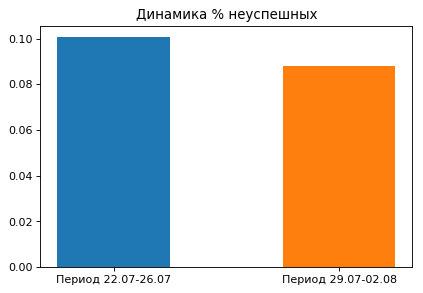

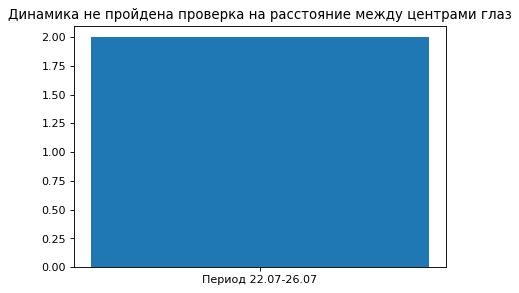

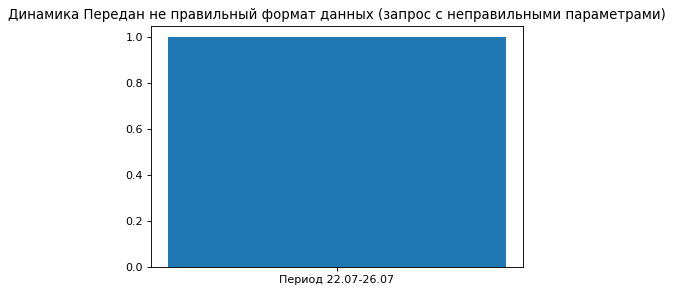

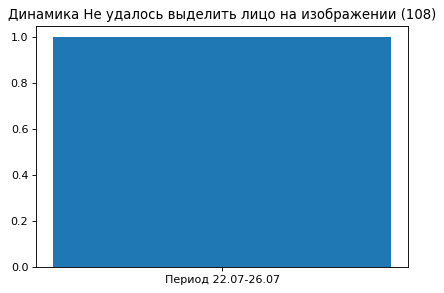

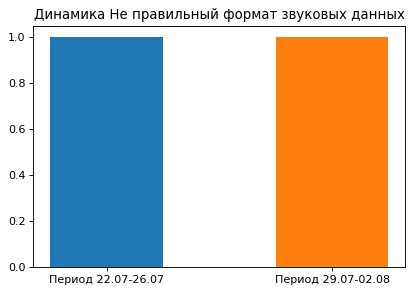

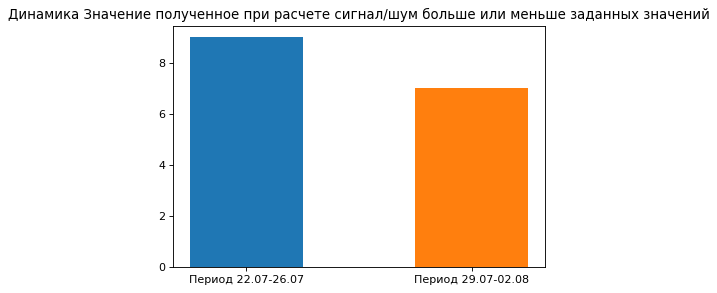

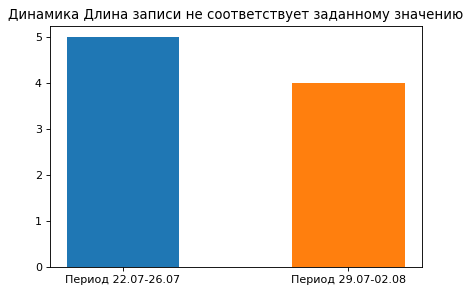

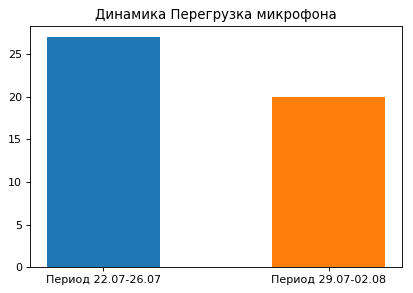

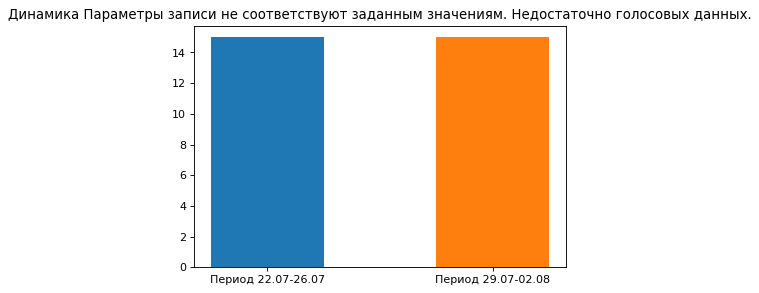

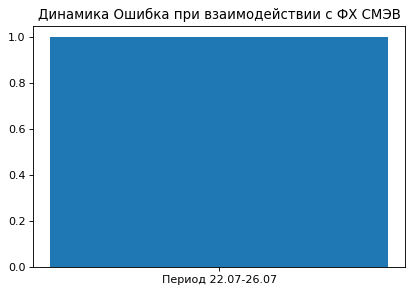

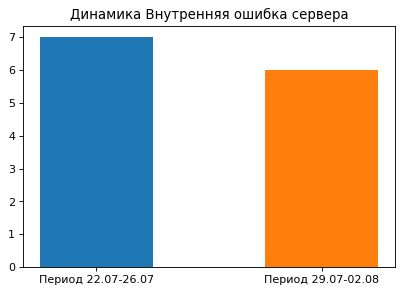

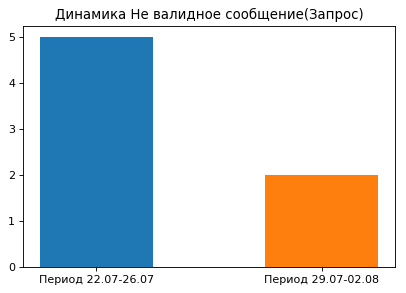

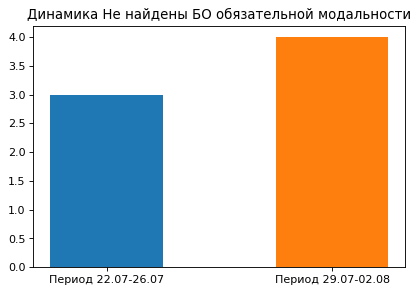

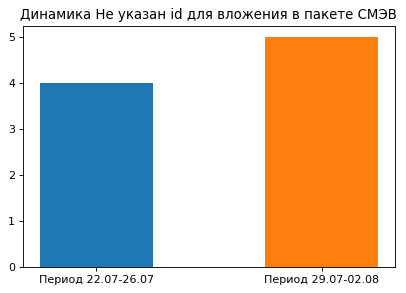

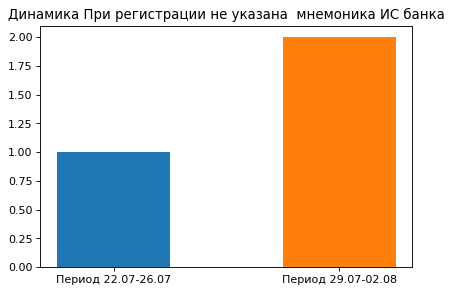

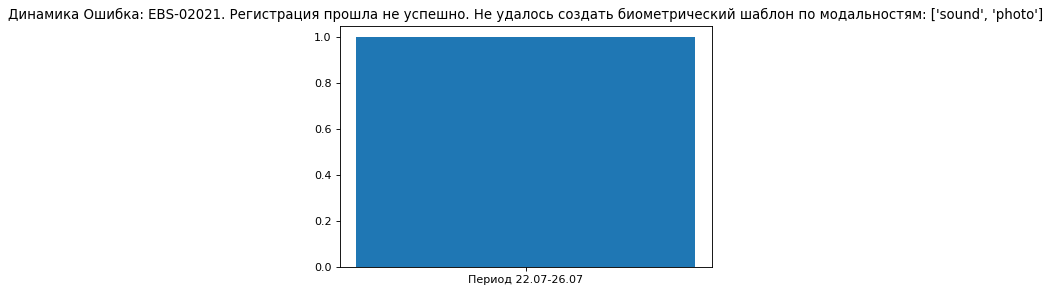

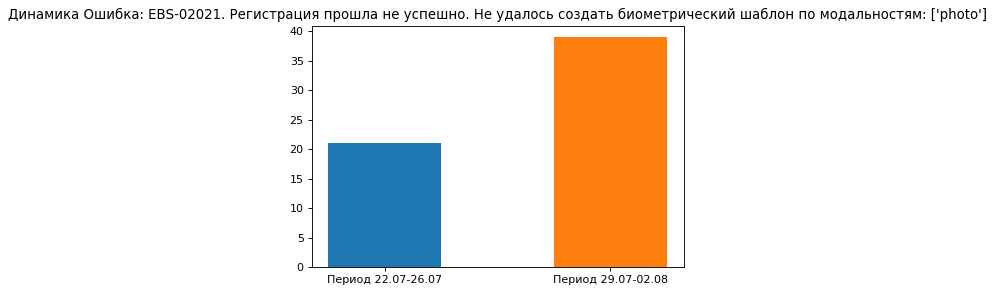

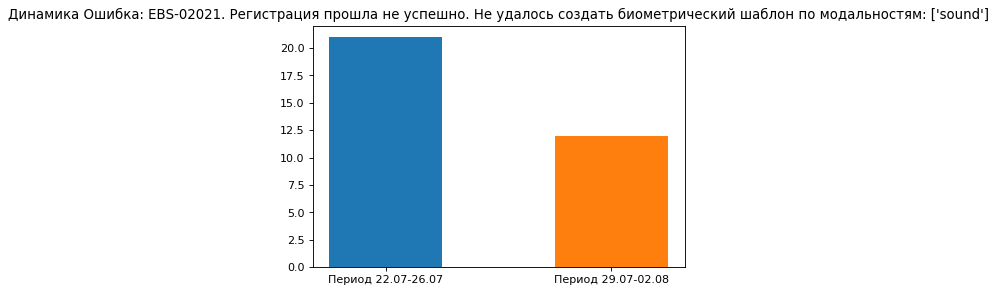

In [169]:
i = 0
for i in range(sum_result.shape[0]):
    value = sum_result.index.values[i]
    
    figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    width = 0.5
    
    try:
        plt.bar(per1, sum1.loc[value], align='center', width=width)
        plt.bar(per2, sum2.loc[value], align='center', width=width)
    except KeyError:
        pass
    
#         plt.bar(per1, sum1.loc[value])
#         plt.bar(per2, sum2.loc[value])
#     except KeyError:
#         if sum1.loc[value] == 0:
#             sum1[value] = 0
#         elif sum2.loc[value] == 0:
#             sum2[value] = 0
#         else:
#         pass
        
    plt.title('Динамика ' + value)
    
    plt.savefig('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/' + value.replace(":", "").replace("/", "_").replace(" ", "_") + '.png')
    plt.show()

In [183]:
doc = Document()

doc.add_heading(per_sum, 0)
p = doc.add_paragraph('Report automatically generated by Andrew Kozlovs script :)\n')

t = doc.add_table(sum_result.shape[0]+1, sum_result.shape[1]+1)

# Хедер таблицы
for j in range(sum_result.shape[-1]):
    t.cell(0,j+1).text = sum_result.columns[j]
    
# Наполнение таблицы
for i in range(sum_result.shape[0]):
    t.cell(i+1,0).text = str(sum_result.index.values[i])
    for j in range(sum_result.shape[-1]):
        t.cell(i+1,j+1).text = str(sum_result.values[i,j])
        
doc.add_picture('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/all_reg_tries.png')
doc.add_picture('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/percent_success.png')
doc.add_picture('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/percent_unsuccess.png')

doc.add_heading("Позитивная динамика", 0)
p1 = doc.add_paragraph("Позитивная динамика")

sum_result_6 = sum_result[6:] # не берем первые 6, т.к. это общие показатели

for posd in range(sum_result_6.shape[0]):
    if sum_result_6.iloc[posd, 2] <= 0:
        value = sum_result_6.index.values[posd]
        doc.add_picture('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/' + value.replace(":", "").replace("/", "_").replace(" ", "_") + '.png')
        
p2 = doc.add_paragraph("Негативная динамика")
doc.add_heading("Негативная динамика", 0)
for negd in range(sum_result_6.shape[0]):
    if sum_result_6.iloc[negd, 2] > 0:
        value = sum_result_6.index.values[negd]
        doc.add_picture('C:/Users/user/PycharmProjects/Monitoring/Monitoring/imgs/' + value.replace(":", "").replace("/", "_").replace(" ", "_") + '.png')

        
doc.save('C:/Users/user/PycharmProjects/Monitoring/Monitoring/reports/report.docx')